##All features has been encoded before we downloaded.So, no encodingfor features in all scripts. But, normalization was done on features, and change 012 to categorical 000,001,010 was done by us too.

##**Original Diabete_012 with 21 Features**

###Correlation Matrix

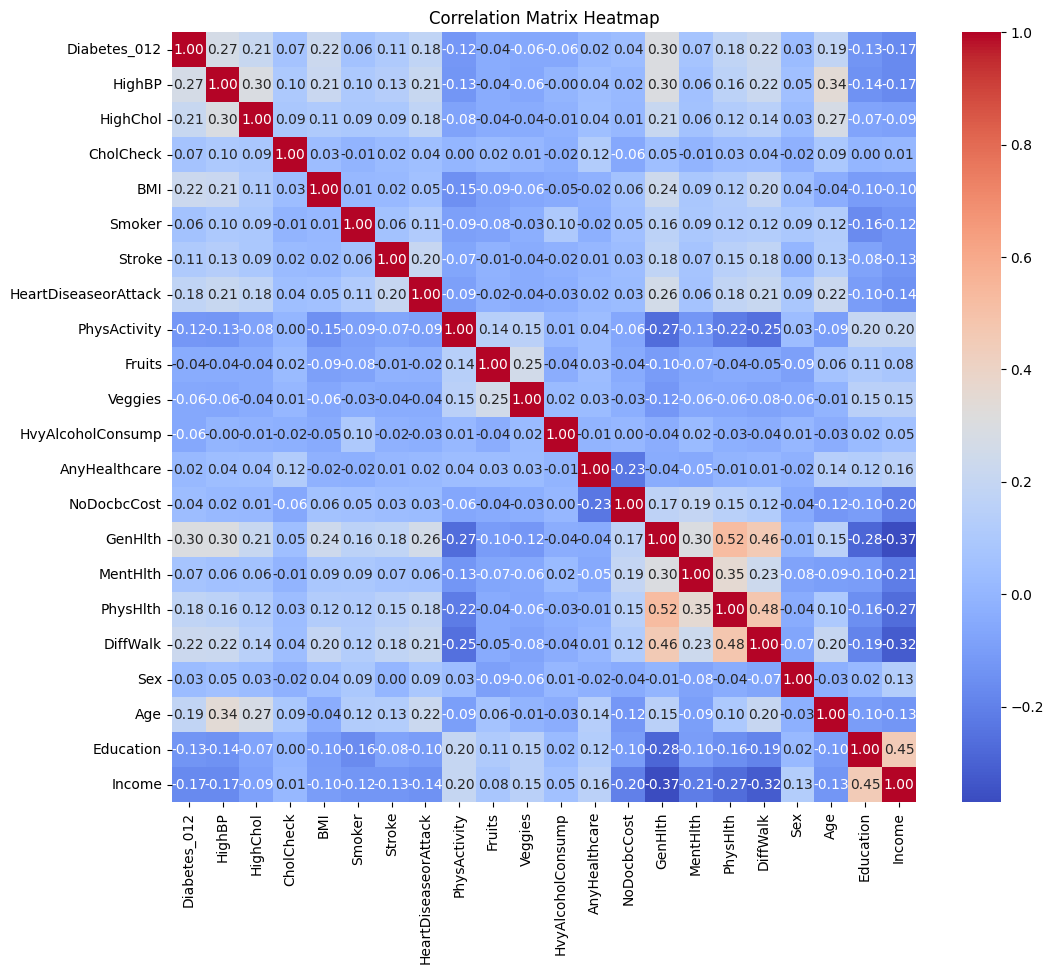

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
df = pd.read_csv(url)


correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

###Boxplots to Visualize Outliers

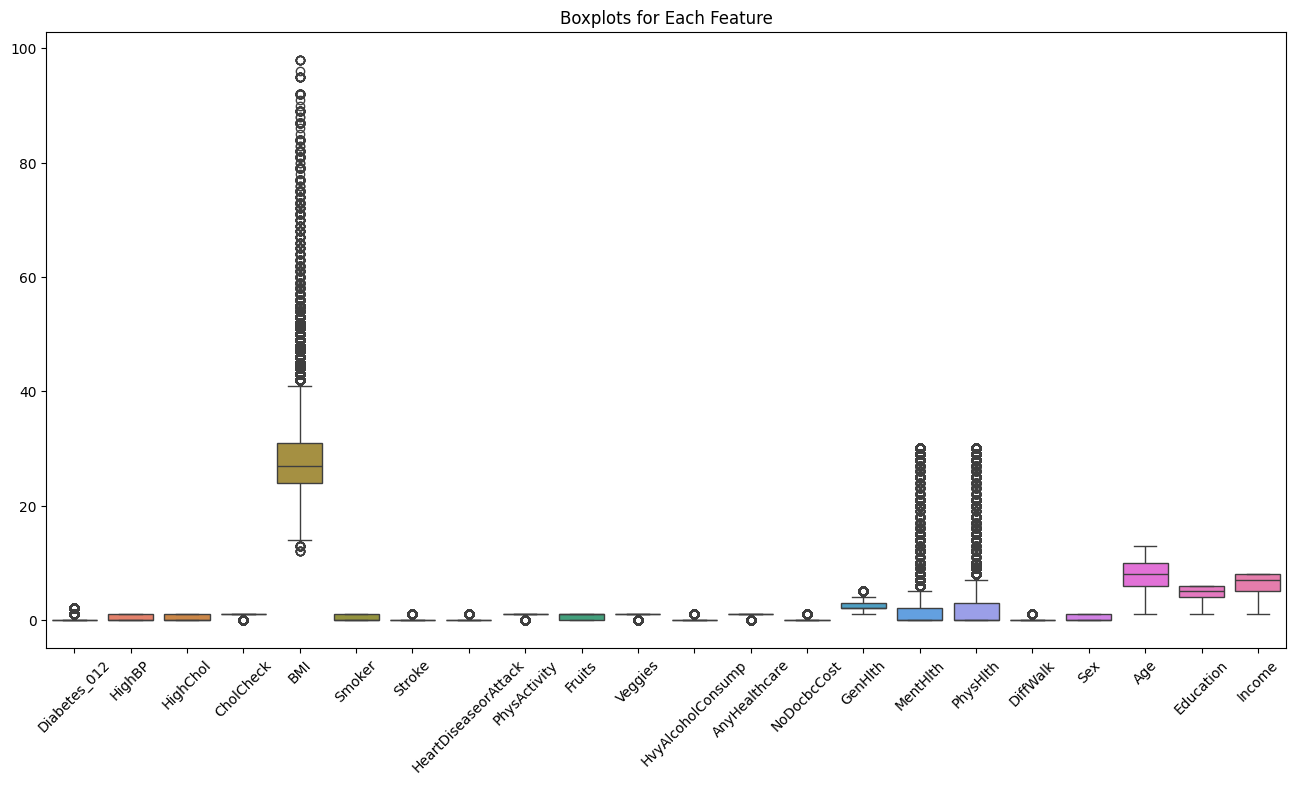

In [ ]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


###Calculate IQR and Remove Outliers

In [ ]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols and col != 'Diabetes_012']
print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]


print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 BMI          24.0
GenHlth       2.0
MentHlth      0.0
PhysHlth      0.0
Age           6.0
Education     4.0
Income        5.0
Name: 0.25, dtype: float64

Q2 (Median):
 BMI          27.0
GenHlth       2.0
MentHlth      0.0
PhysHlth      0.0
Age           8.0
Education     5.0
Income        7.0
Name: 0.5, dtype: float64

Q3:
 BMI          31.0
GenHlth       3.0
MentHlth      2.0
PhysHlth      3.0
Age          10.0
Education     6.0
Income        8.0
Name: 0.75, dtype: float64

IQR:
 BMI          7.0
GenHlth      1.0
MentHlth     2.0
PhysHlth     3.0
Age          4.0
Education    2.0
Income       3.0
dtype: float64

Original shape: (253680, 22)
Cleaned shape: (164444, 22)


###Boxplots after Removing Outliers Based on IQR

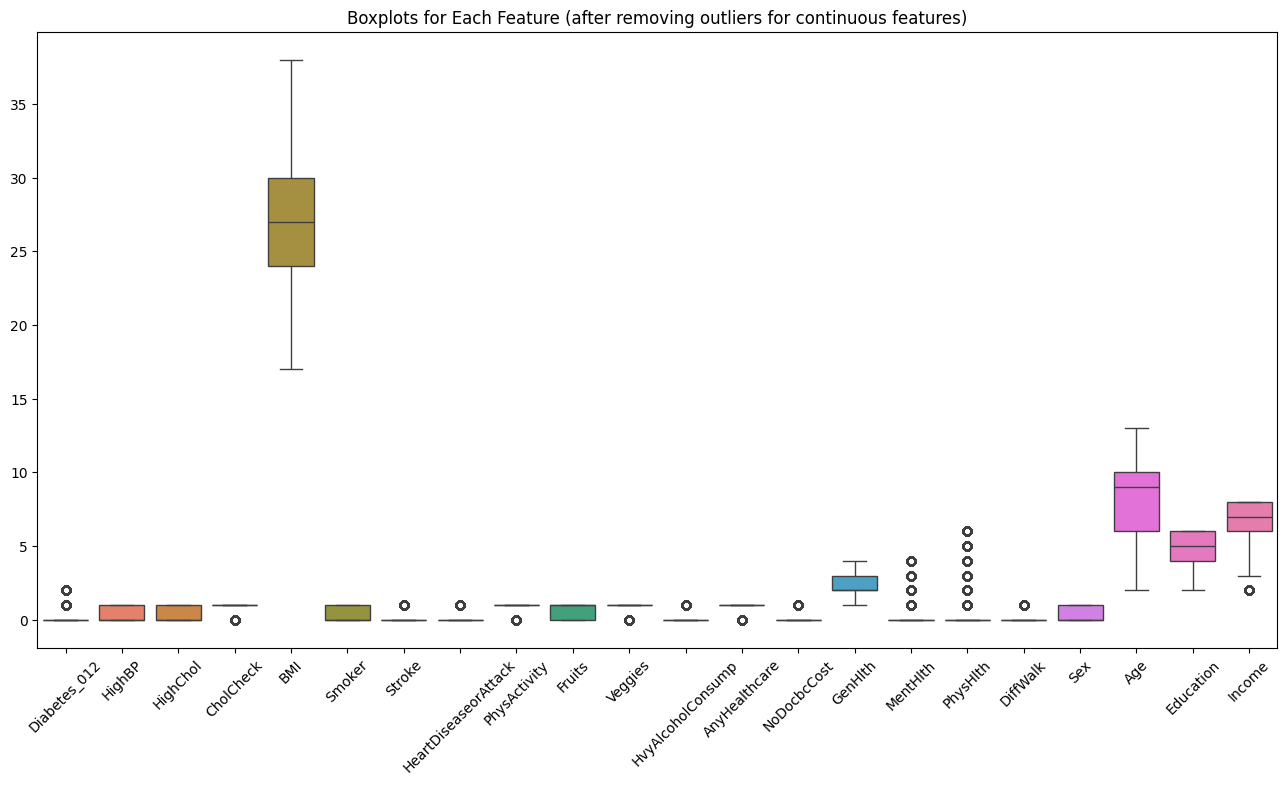

In [ ]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature (after removing outliers for continuous features)')
plt.show()

###Histograms before and after Removing Outliers (blue is before, yellow is after)

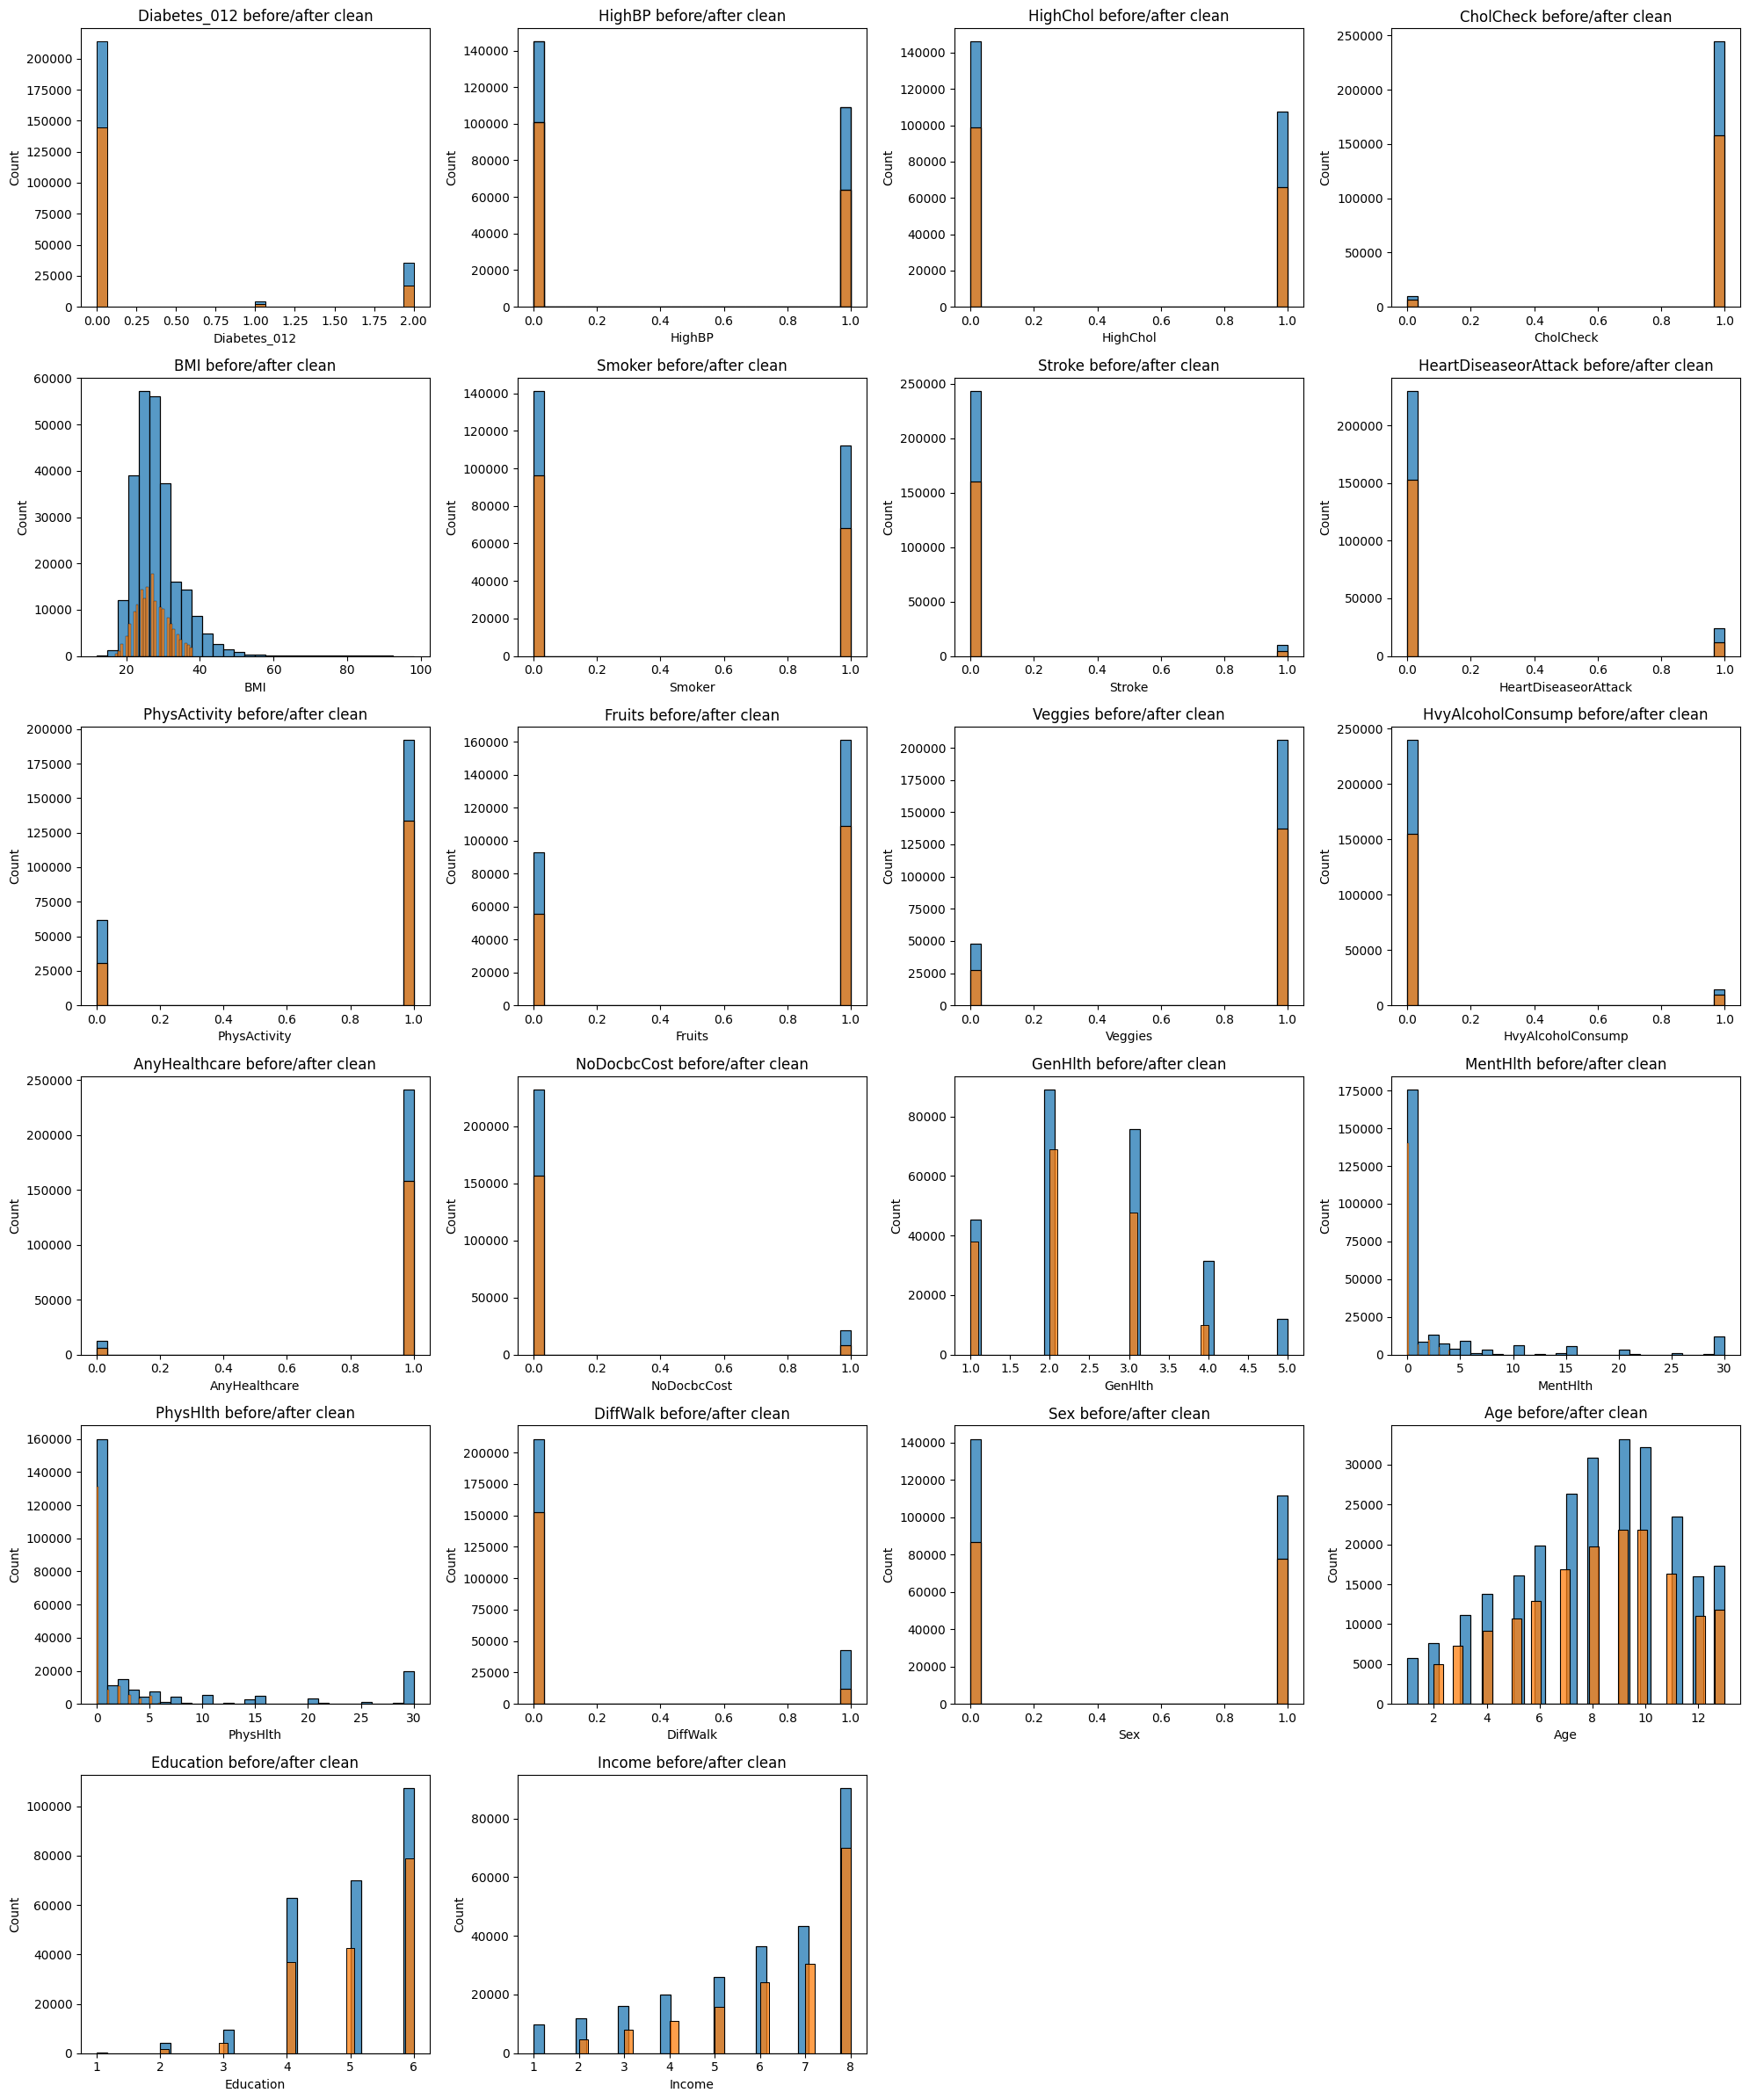

In [ ]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)

    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_clean[col], bins=30, kde=False)
    plt.title(f"{col} before/after clean")

    plt.tight_layout()

plt.show()

In [ ]:
# save the cleaned data:

df_clean.to_csv('cleaned_diabetes.csv', index=False)


###Neural Networks on Original Dataset

####3 layers, 8 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8818 - loss: 0.5697 - val_accuracy: 0.8763 - val_loss: 0.3575
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8810 - loss: 0.3439 - val_accuracy: 0.8763 - val_loss: 0.3496
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - loss: 0.3436 - val_accuracy: 0.8763 - val_loss: 0.3489
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8818 - loss: 0.3392 - val_accuracy: 0.8763 - val_loss: 0.3493
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8810 - loss: 0.3383 - val_accuracy: 0.8763 - val_loss: 0.3475
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8812 - loss: 0.3386 - val_accuracy: 0.8763 - val_loss: 0.3473
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8802 - loss: 0.3385 - val_accuracy: 0.8763 - val_loss: 0.3470
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3385 - val_accuracy: 0

####3 layers, 16 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7442 - loss: 0.6039 - val_accuracy: 0.8763 - val_loss: 0.3560
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.3448 - val_accuracy: 0.8763 - val_loss: 0.3495
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8808 - loss: 0.3387 - val_accuracy: 0.8763 - val_loss: 0.3489
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8813 - loss: 0.3381 - val_accuracy: 0.8763 - val_loss: 0.3477
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.3394 - val_accuracy: 0.8763 - val_loss: 0.3475
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8807 - loss: 0.3393 - val_accuracy: 0.8765 - val_loss: 0.3469
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8805 - loss: 0.3405 - val_accuracy: 0.8764 - val_loss: 0.3472
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8808 - loss: 0.3402 - val_accuracy: 0.8766 - val_

####3 layers, 24 neurons on input and 1 hidden layer, 3 neurons on output layer

####3 layers, 36 neurons on input and 1 hidden layer, 3 neurons on output layer

##**Diabete_012 w/o Outliers with 21 Features**

###Correlation Matrix of Cleaned Dataset w/o Outliers

100%|██████████| 22/22 [00:00<00:00, 24.75it/s]


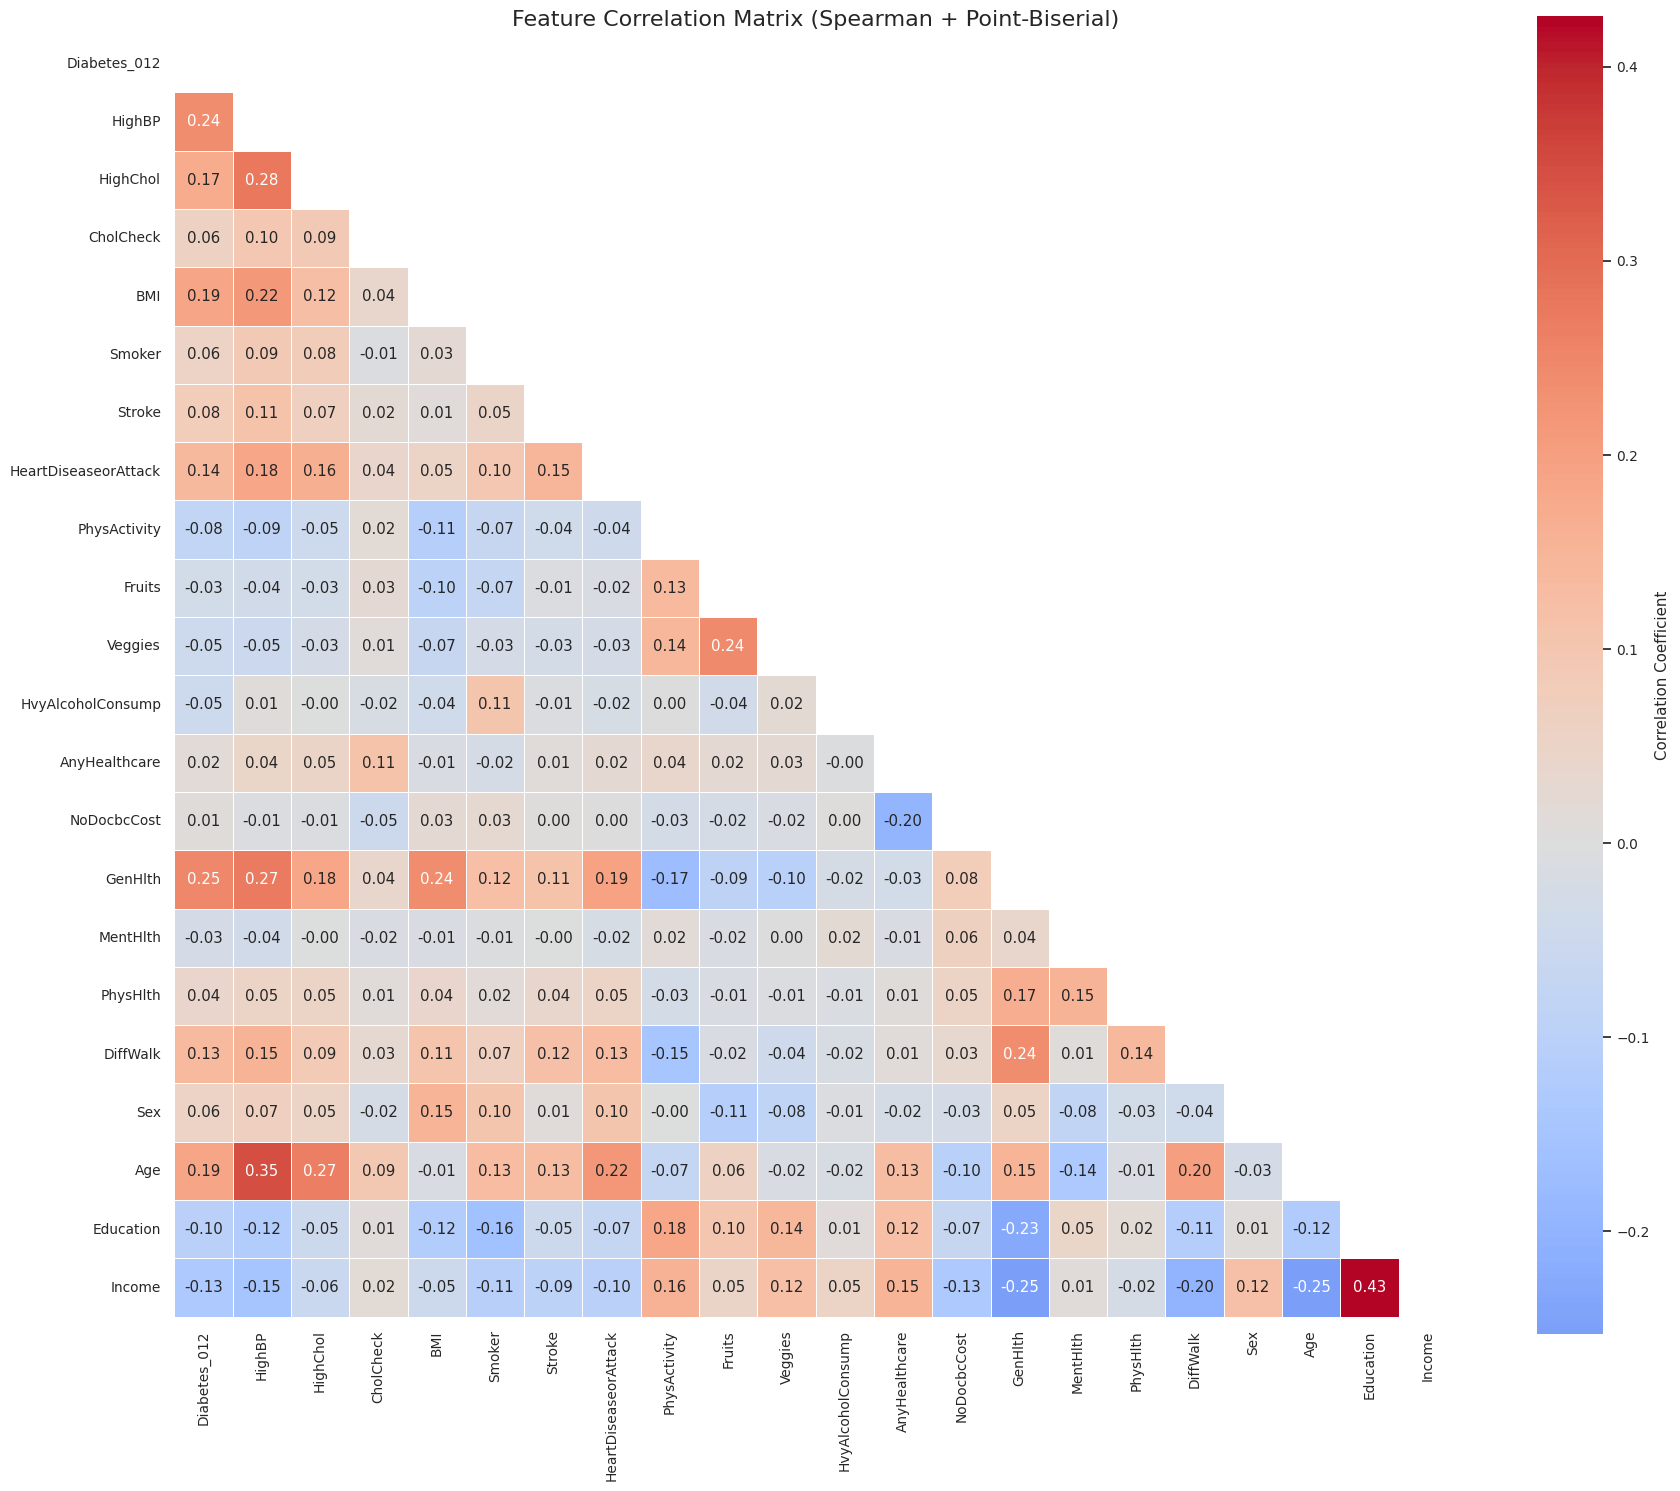


Top correlations with Diabetes_012:
Diabetes_012            1.000000
GenHlth                 0.247390
HighBP                  0.235667
BMI                     0.187761
Age                     0.187398
HighChol                0.172871
HeartDiseaseorAttack    0.139098
DiffWalk                0.134196
Income                 -0.133662
Education              -0.099945
Stroke                  0.079404
PhysActivity           -0.075674
CholCheck               0.061924
Smoker                  0.055680
Name: Diabetes_012, dtype: float64
Keep 13 features and get rid of the rest. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr, spearmanr
from tqdm import tqdm

# Load dataset
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Detect binary columns
is_binary = {col: df[col].nunique() == 2 for col in df.columns}

# Initialize correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

# Compute correlations (lower triangle only)
for i, col1 in enumerate(tqdm(df.columns)):
    for j, col2 in enumerate(df.columns[:i+1]):
        x = df[col1]
        y = df[col2]

        if col1 == col2:
            corr = 1.0
        else:
            try:
                if is_binary[col1] and is_binary[col2]:
                    corr = pearsonr(x, y)[0]  # Phi coefficient
                elif is_binary[col1]:
                    corr = pointbiserialr(y, x)[0]  # y must be continuous
                elif is_binary[col2]:
                    corr = pointbiserialr(x, y)[0]
                else:
                    corr = spearmanr(x, y)[0]  # Use Spearman for non-linear
            except:
                corr = np.nan

        # Fill symmetric entries
        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Plotting
plt.figure(figsize=(18, 15))
sns.set(style="white", font_scale=0.9)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
    mask=mask
)

plt.title("Feature Correlation Matrix (Spearman + Point-Biserial)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Target variable correlations
if 'Diabetes_012' in df.columns:
    target_corr = corr_matrix['Diabetes_012'].sort_values(key=abs, ascending=False)
    print("\nTop correlations with Diabetes_012:")
    print(target_corr.head(14))
print("Keep 13 features and get rid of the rest. ")

###Diabete_012 w/o Outliers after Feature Selection with 13 features

####3 layers, 8 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1mOOiXrDJ7U3KrFDEuuGU3lW5fMblIjEk'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")
# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8409 - loss: 0.4804 - val_accuracy: 0.8453 - val_loss: 0.4052
Epoch 2/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8477 - loss: 0.3999 - val_accuracy: 0.8470 - val_loss: 0.4021
Epoch 3/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8472 - loss: 0.4011 - val_accuracy: 0.8475 - val_loss: 0.4008
Epoch 4/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8491 - loss: 0.3958 - val_accuracy: 0.8476 - val_loss: 0.4005
Epoch 5/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8472 - loss: 0.3977 - val_accuracy: 0.8470 - val_loss: 0.3996
Epoch 6/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8481 - loss: 0.3972 - val_accuracy: 0.8473 - val_loss: 0.3995
Epoch 7/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8477 - loss: 0.3974 - val_accuracy: 0.8472 - val_loss: 0.3992
Epoch 8/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8479 - loss: 0.3983 - val_accurac

####3 layers, 16 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1mOOiXrDJ7U3KrFDEuuGU3lW5fMblIjEk'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7846 - loss: 0.5580 - val_accuracy: 0.8456 - val_loss: 0.4044
Epoch 2/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8469 - loss: 0.4008 - val_accuracy: 0.8487 - val_loss: 0.4018
Epoch 3/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8488 - loss: 0.3977 - val_accuracy: 0.8476 - val_loss: 0.4005
Epoch 4/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8482 - loss: 0.3979 - val_accuracy: 0.8480 - val_loss: 0.3999
Epoch 5/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8497 - loss: 0.3955 - val_accuracy: 0.8477 - val_loss: 0.3994
Epoch 6/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8503 - loss: 0.3929 - val_accuracy: 0.8480 - val_loss: 0.3991
Epoch 7/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8477 - loss: 0.3966 - val_accuracy: 0.8490 - val_loss: 0.3994
Epoch 8/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8498 - loss: 0.3927 - val_accurac

## Original Diabete_5050

###Correlation Matrix

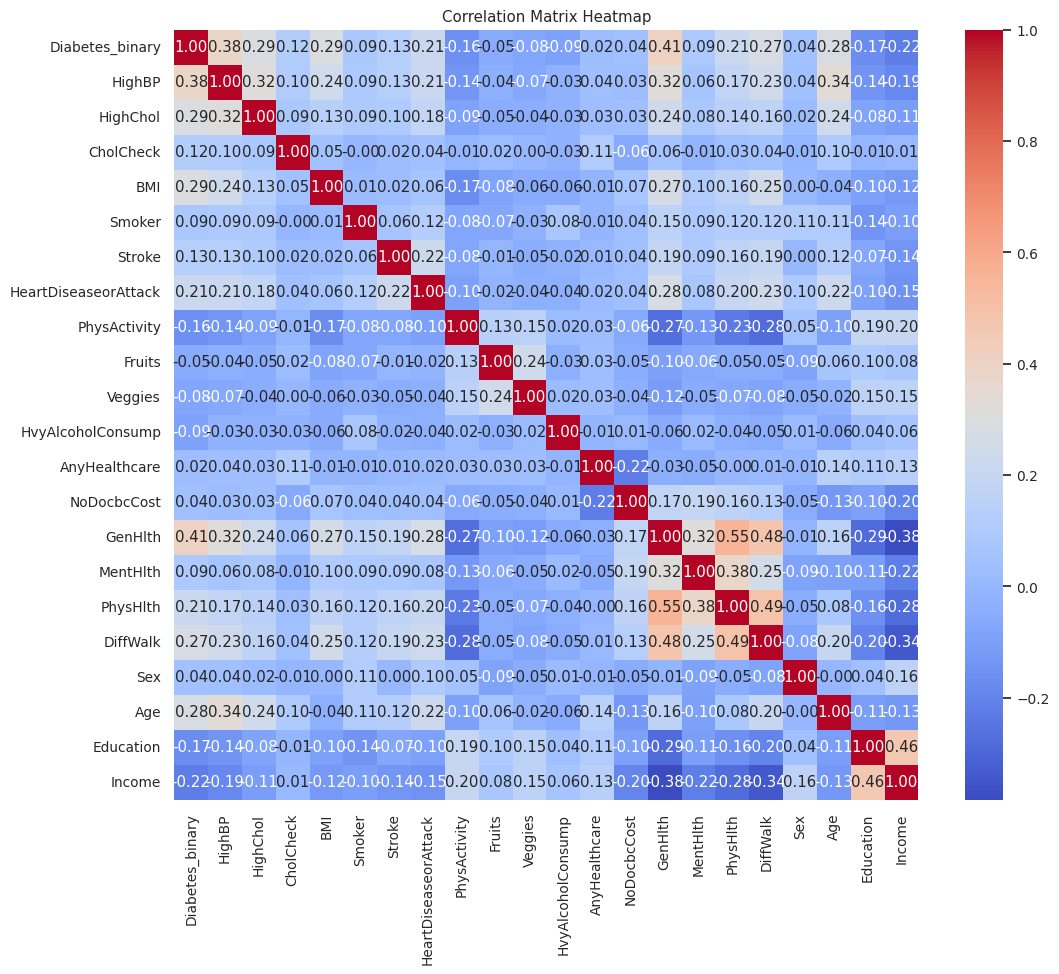

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)


correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

###Boxplots before and after Removing Outliers
###Histograms before and after removing outliers (B is before, Y is after)

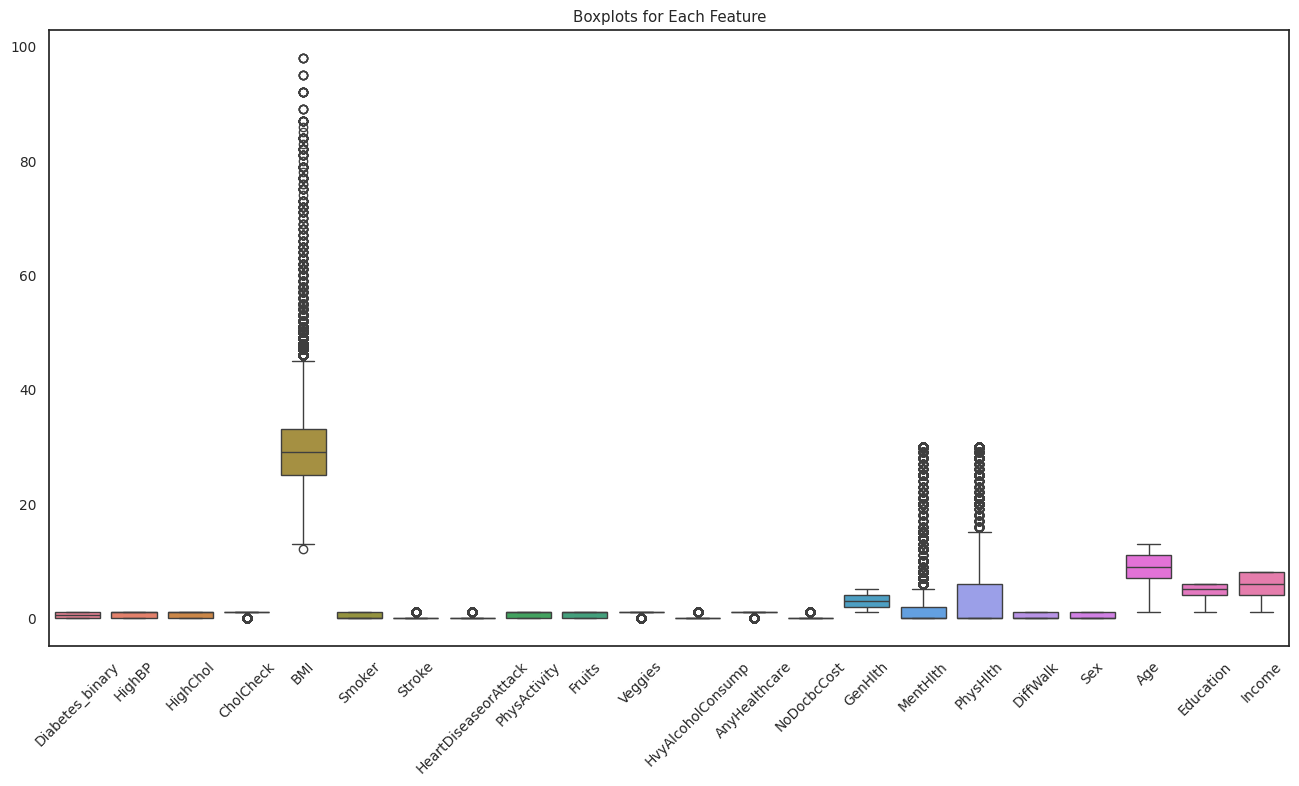

Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 BMI          25.0
GenHlth       2.0
MentHlth      0.0
PhysHlth      0.0
Age           7.0
Education     4.0
Income        4.0
Name: 0.25, dtype: float64

Q2 (Median):
 BMI          29.0
GenHlth       3.0
MentHlth      0.0
PhysHlth      0.0
Age           9.0
Education     5.0
Income        6.0
Name: 0.5, dtype: float64

Q3:
 BMI          33.0
GenHlth       4.0
MentHlth      2.0
PhysHlth      6.0
Age          11.0
Education     6.0
Income        8.0
Name: 0.75, dtype: float64

IQR:
 BMI          8.0
GenHlth      2.0
MentHlth     2.0
PhysHlth     6.0
Age          4.0
Education    2.0
Income       4.0
dtype: float64

Original shape: (70692, 22)
Cleaned shape: (45380, 22)


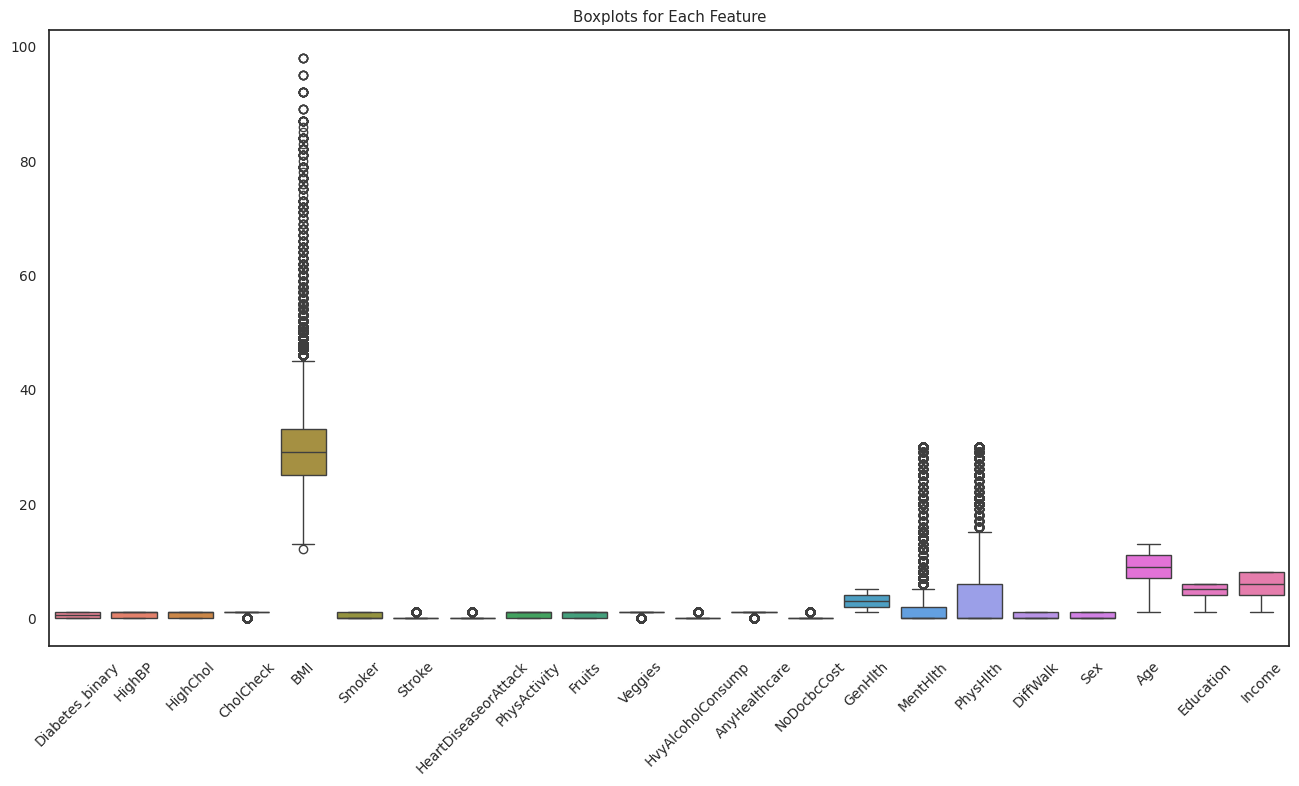

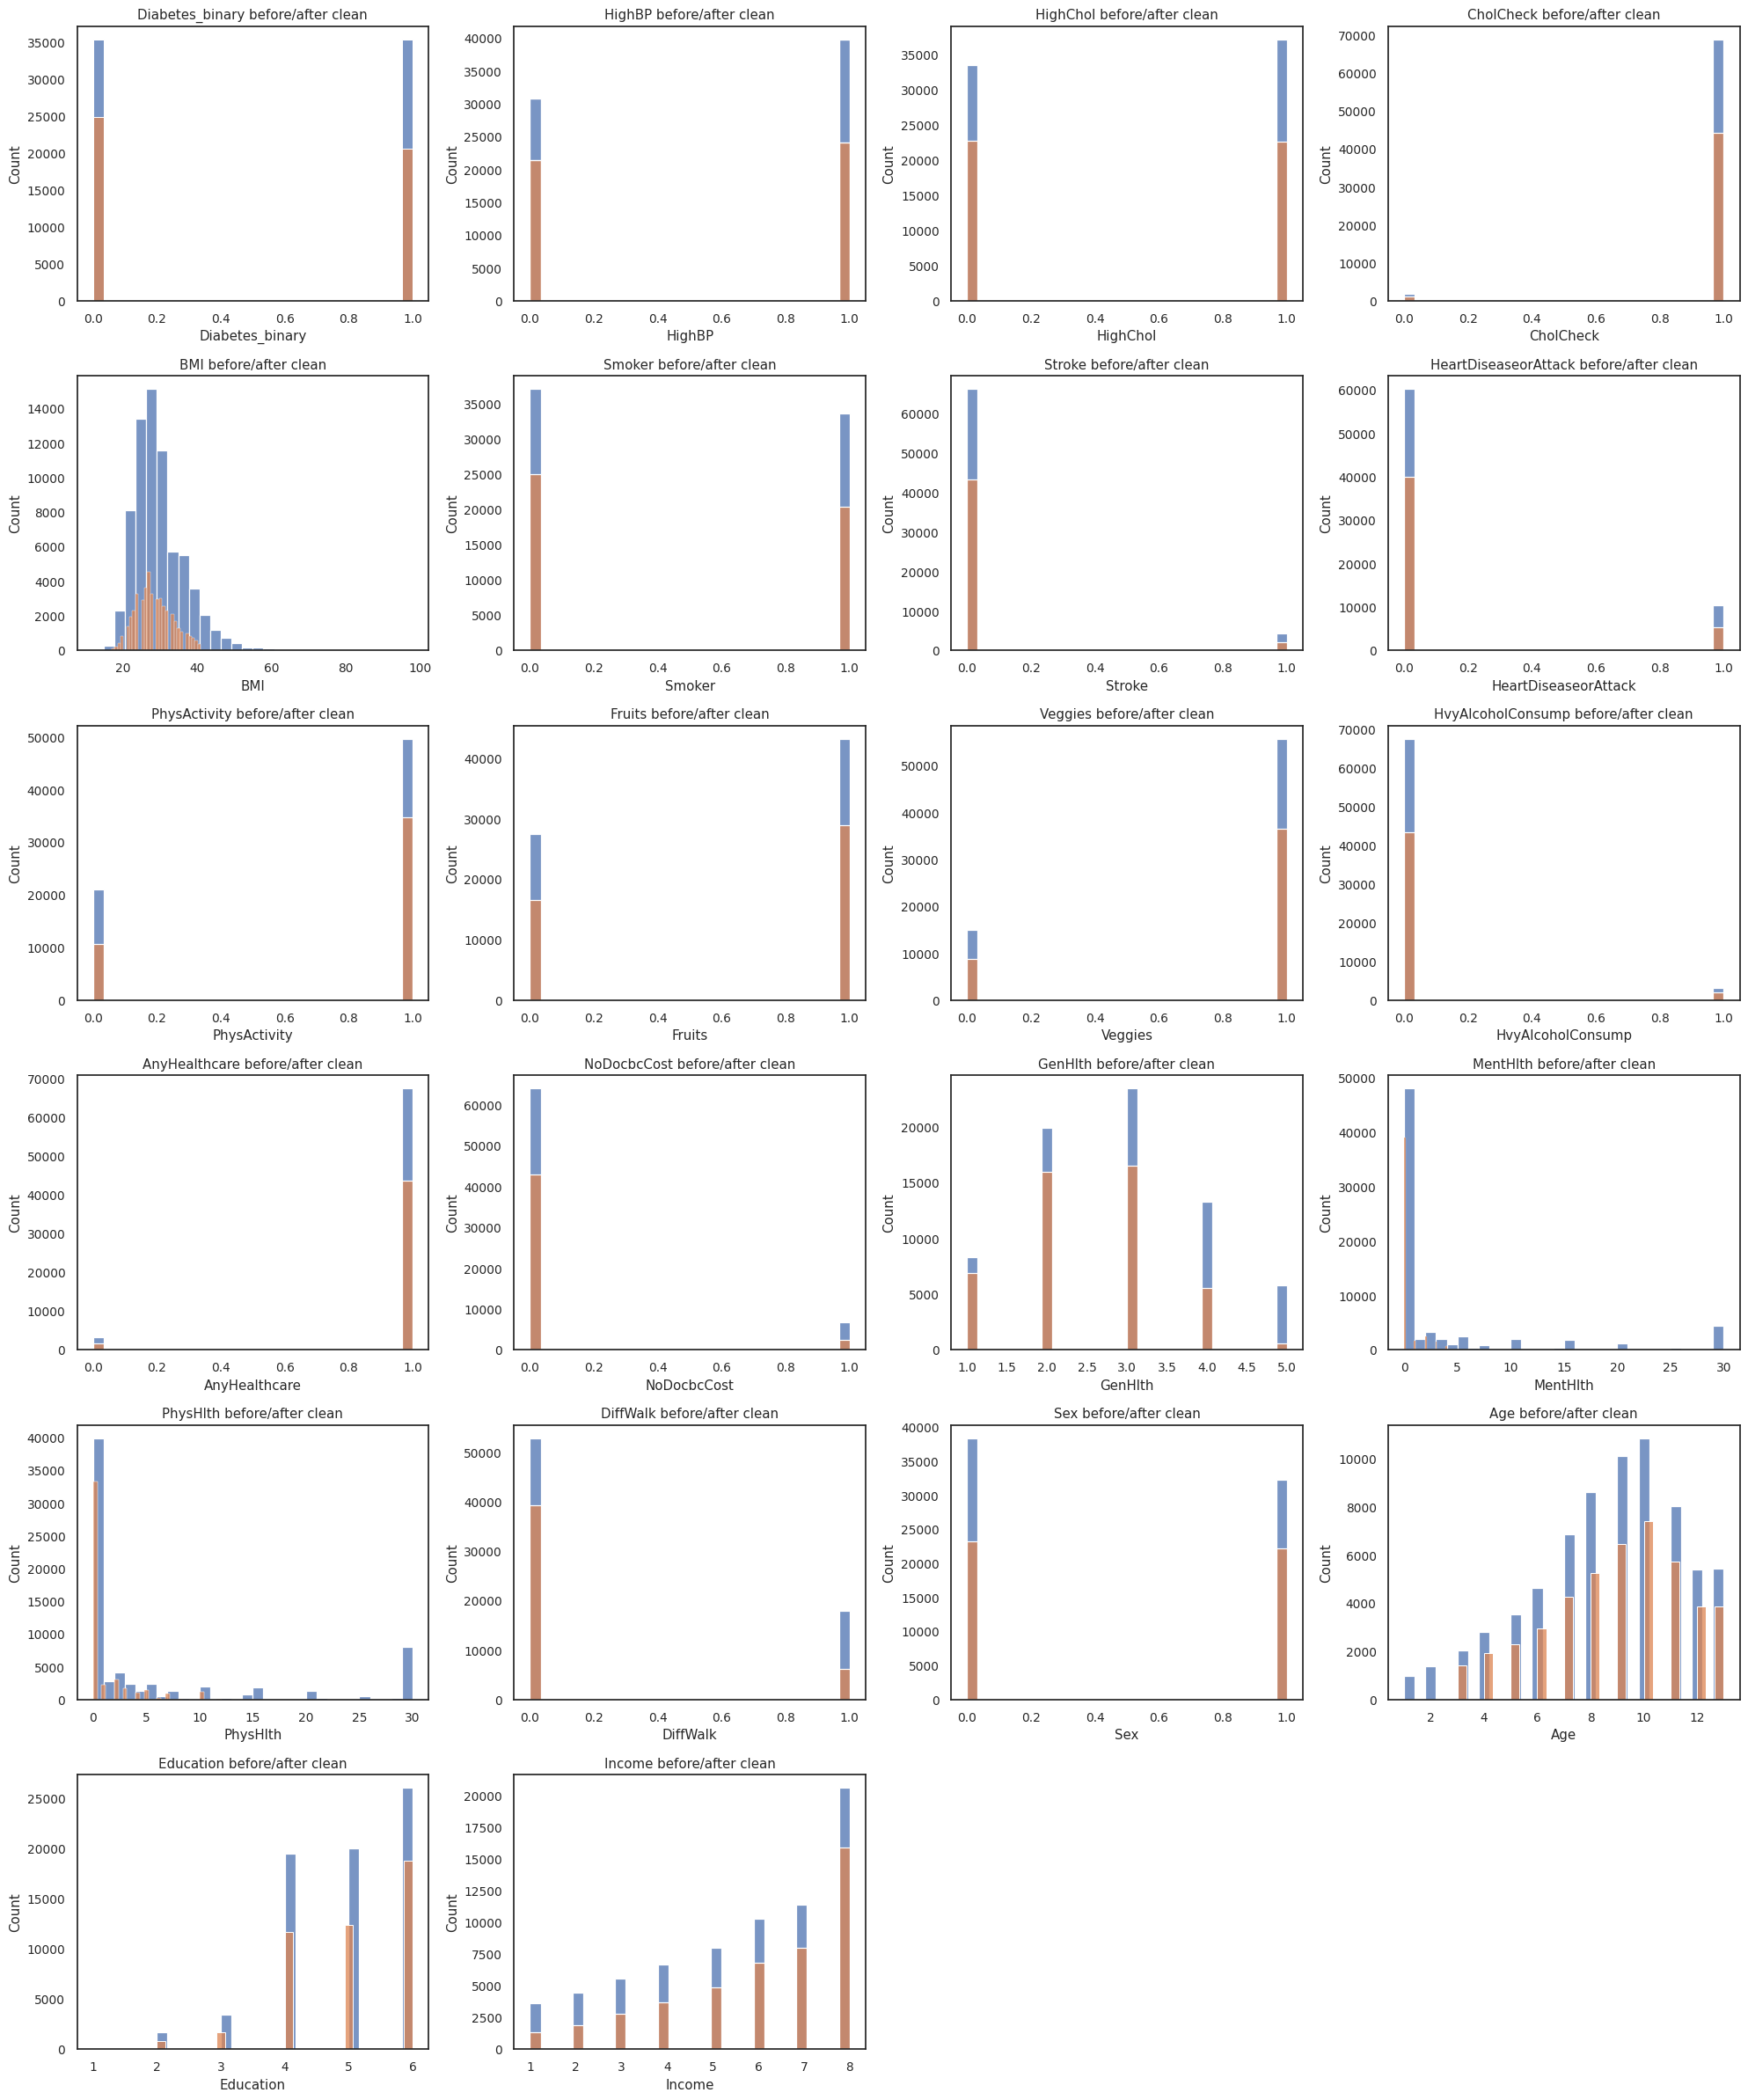

In [ ]:
##############################Boxplots before removing outliers#########################################################
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()

############################### IQR ###################################################
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols and col != 'Diabetes_012']
print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]


print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

##############################Boxplots after removing outliers#########################################################

plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


################################# Histograms before and after removing outliers (B is before, Y is after)#################################################
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)

    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_clean[col], bins=30, kde=False)
    plt.title(f"{col} before/after clean")

    plt.tight_layout()

plt.show()


In [ ]:
# save the cleaned data:

df_clean.to_csv('5050diabetes_no_outliers.csv', index=False)

####3 layers, 8 neurons on input and 1 hidden layer, 2 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='relu'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(2, activation='sigmoid'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")
# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6888 - loss: 0.6058 - val_accuracy: 0.7456 - val_loss: 0.5278
Epoch 2/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7438 - loss: 0.5235 - val_accuracy: 0.7477 - val_loss: 0.5179
Epoch 3/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7472 - loss: 0.5156 - val_accuracy: 0.7468 - val_loss: 0.5146
Epoch 4/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7539 - loss: 0.5101 - val_accuracy: 0.7456 - val_loss: 0.5123
Epoch 5/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7480 - loss: 0.5132 - val_accuracy: 0.7477 - val_loss: 0.5105
Epoch 6/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7541 - loss: 0.5050 - val_accuracy: 0.7468 - val_loss: 0.5097
Epoch 7/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7496 - loss: 0.5096 - val_accuracy: 0.7475 - val_loss: 0.5084
Epoch 8/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.5044 - val_accuracy: 0.7468 - val_

####3 layers, 16 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(2, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6995 - loss: 0.5952 - val_accuracy: 0.7482 - val_loss: 0.5205
Epoch 2/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7508 - loss: 0.5117 - val_accuracy: 0.7472 - val_loss: 0.5100
Epoch 3/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7512 - loss: 0.5108 - val_accuracy: 0.7479 - val_loss: 0.5092
Epoch 4/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7504 - loss: 0.5085 - val_accuracy: 0.7473 - val_loss: 0.5096
Epoch 5/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7464 - loss: 0.5111 - val_accuracy: 0.7459 - val_loss: 0.5104
Epoch 6/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7494 - loss: 0.5083 - val_accuracy: 0.7465 - val_loss: 0.5073
Epoch 7/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7508 - loss: 0.5068 - val_accuracy: 0.7484 - val_loss: 0.5081
Epoch 8/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7492 - loss: 0.5079 - val_accuracy: 0.7477 - val_

###5050 Dataset w/o Outliers with feature selections

100%|██████████| 22/22 [00:00<00:00, 55.98it/s] 


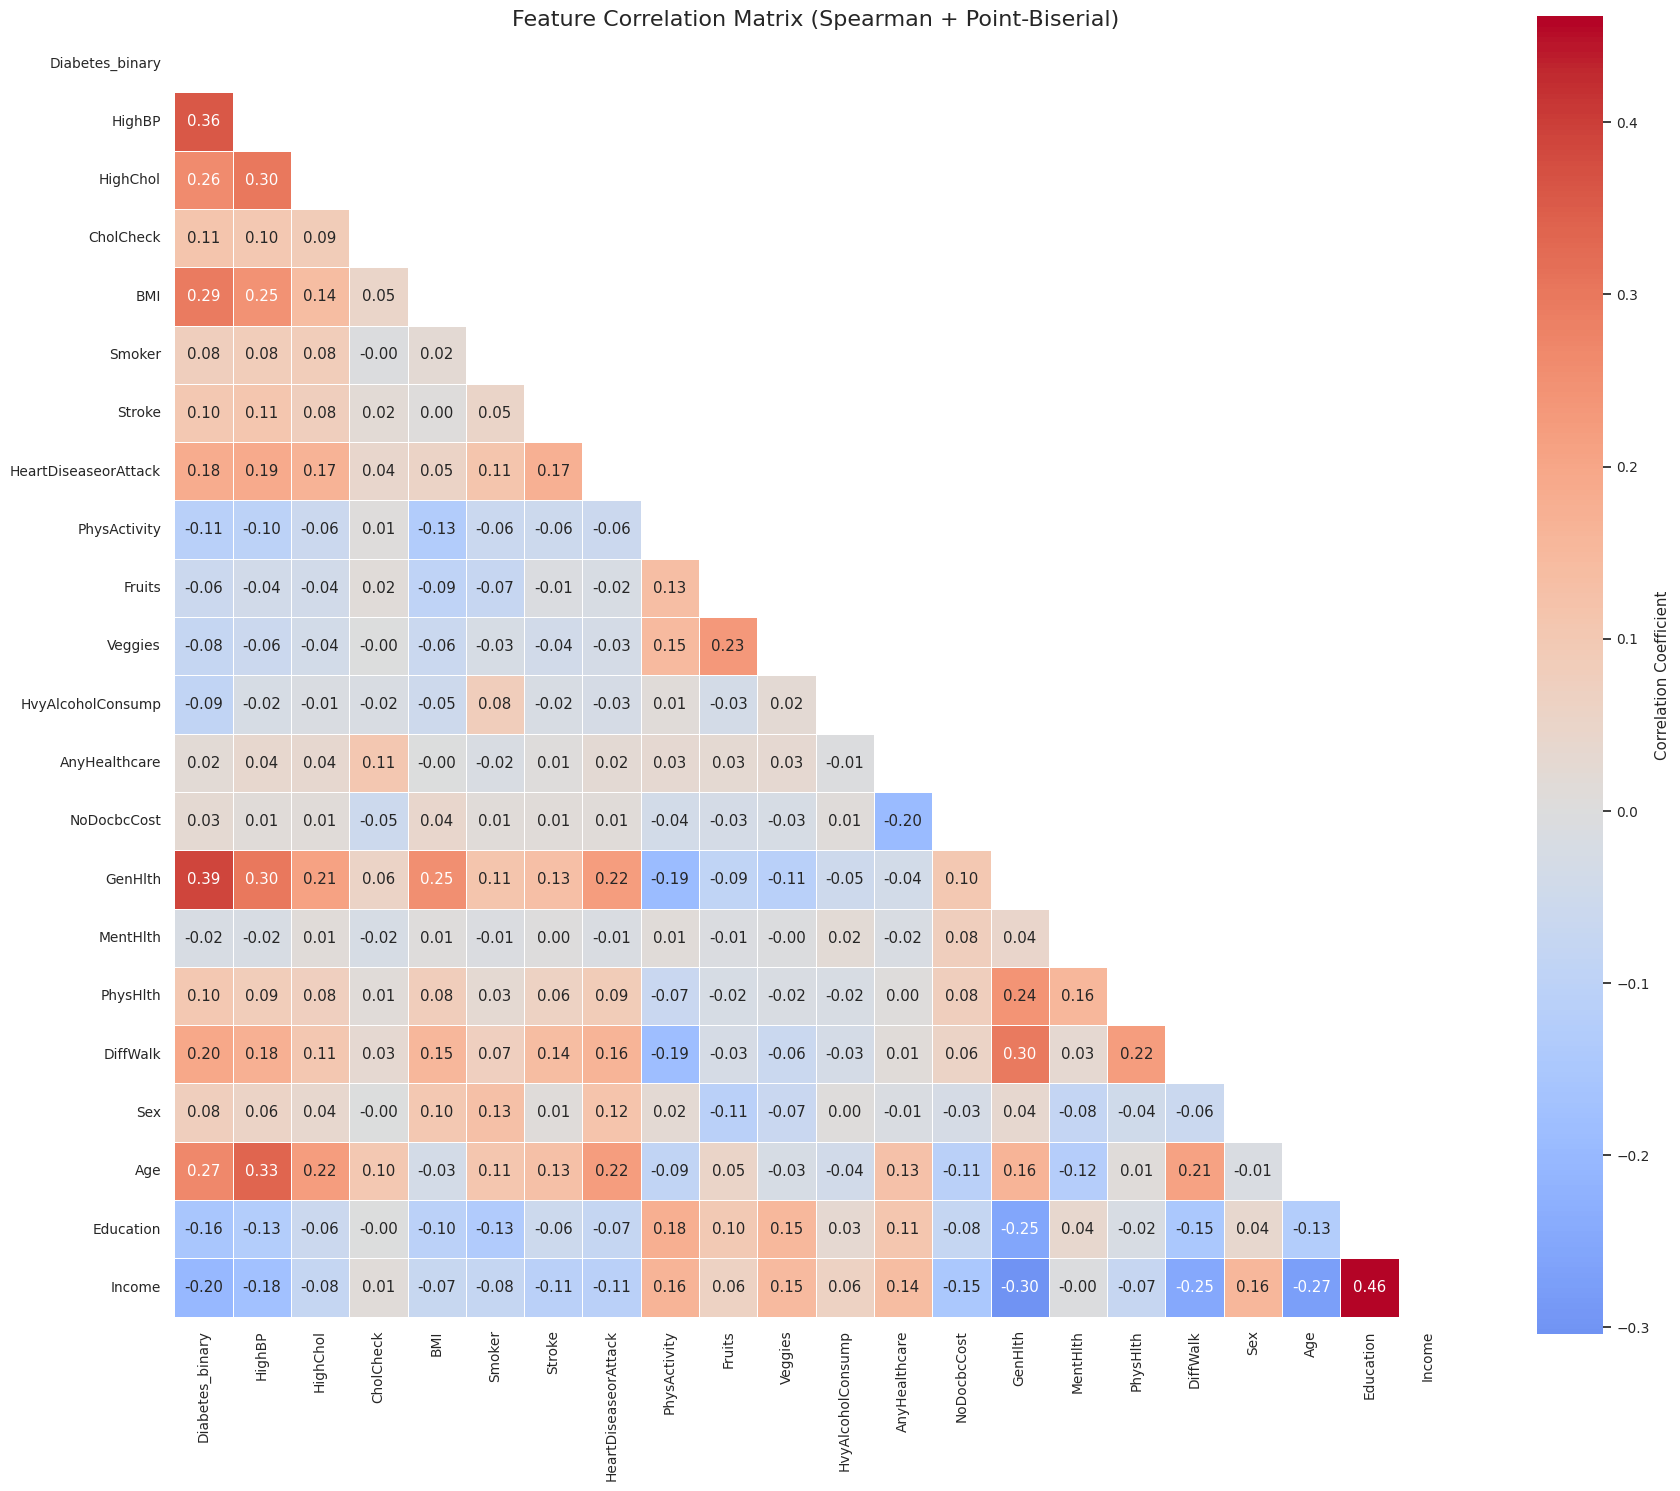


Top correlations with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.391582
HighBP                  0.358415
BMI                     0.292604
Age                     0.269870
HighChol                0.259636
Income                 -0.204546
DiffWalk                0.197518
HeartDiseaseorAttack    0.184116
Education              -0.156818
PhysActivity           -0.113841
CholCheck               0.112385
Stroke                  0.103806
PhysHlth                0.103019
HvyAlcoholConsump      -0.085780
Name: Diabetes_binary, dtype: float64
Keep 14 features and get rid of the rest. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr, spearmanr
from tqdm import tqdm

# Load dataset
url = 'https://drive.google.com/uc?id=1u017Ge01X02YUEJbEVYCuKOwDMwXBCy1'
df = pd.read_csv(url)

# Detect binary columns
is_binary = {col: df[col].nunique() == 2 for col in df.columns}

# Initialize correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

# Compute correlations (lower triangle only)
for i, col1 in enumerate(tqdm(df.columns)):
    for j, col2 in enumerate(df.columns[:i+1]):
        x = df[col1]
        y = df[col2]

        if col1 == col2:
            corr = 1.0
        else:
            try:
                if is_binary[col1] and is_binary[col2]:
                    corr = pearsonr(x, y)[0]  # Phi coefficient
                elif is_binary[col1]:
                    corr = pointbiserialr(y, x)[0]  # y must be continuous
                elif is_binary[col2]:
                    corr = pointbiserialr(x, y)[0]
                else:
                    corr = spearmanr(x, y)[0]  # Use Spearman for non-linear
            except:
                corr = np.nan

        # Fill symmetric entries
        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Plotting
plt.figure(figsize=(18, 15))
sns.set(style="white", font_scale=0.9)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
    mask=mask
)

plt.title("Feature Correlation Matrix (Spearman + Point-Biserial)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Target variable correlations
if 'Diabetes_binary' in df.columns:
    target_corr = corr_matrix['Diabetes_binary'].sort_values(key=abs, ascending=False)
    print("\nTop correlations with Diabetes_binary:")
    print(target_corr.head(15))
print("Keep 14 features and get rid of the rest. ")

####3 layers, 8 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1or19PphGxg-JAi-2TJS97PdL9ZilUQIh'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=14, activation='relu'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(2, activation='sigmoid'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5999 - loss: 0.6584 - val_accuracy: 0.7249 - val_loss: 0.5477
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7271 - loss: 0.5444 - val_accuracy: 0.7293 - val_loss: 0.5286
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7355 - loss: 0.5262 - val_accuracy: 0.7287 - val_loss: 0.5232
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7378 - loss: 0.5236 - val_accuracy: 0.7301 - val_loss: 0.5207
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.5216 - val_accuracy: 0.7251 - val_loss: 0.5204
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7437 - loss: 0.5168 - val_accuracy: 0.7326 - val_loss: 0.5183
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7419 - loss: 0.5187 - val_accuracy: 0.7298 - val_loss: 0.5183
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7398 - loss: 0.5163 - val_accuracy: 0.7329 - val_

####3 layers, 16 neurons on input and 1 hidden layer, 3 neurons on output layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1or19PphGxg-JAi-2TJS97PdL9ZilUQIh'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values


# 012 -? 000,001,010
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=14, activation='relu'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Second hidden layer
model.add(Dense(2, activation='sigmoid'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

# --- METRIC REPORT (Formatted like tree models) ---
print("\n--- Metrics Report for ANN Model ---")

# Per-class metrics
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

for i in range(num_classes):
    print(f"Class {i} Precision : {precision[i]:.4f}")
    print(f"Class {i} Recall    : {recall[i]:.4f}")
    print(f"Class {i} F1-Score  : {f1[i]:.4f}")

# Macro-averaged metrics
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\nMacro-Averaged Metrics:")
print(f"{'precision':10s}: {macro_precision:.4f}")
print(f"{'recall':10s}   : {macro_recall:.4f}")
print(f"{'f1-score':10s} : {macro_f1:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5722 - loss: 0.7348 - val_accuracy: 0.7337 - val_loss: 0.5283
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7340 - loss: 0.5261 - val_accuracy: 0.7298 - val_loss: 0.5224
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7381 - loss: 0.5210 - val_accuracy: 0.7276 - val_loss: 0.5210
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.5185 - val_accuracy: 0.7282 - val_loss: 0.5202
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - loss: 0.5186 - val_accuracy: 0.7298 - val_loss: 0.5176
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7421 - loss: 0.5127 - val_accuracy: 0.7326 - val_loss: 0.5186
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: 0.5129 - val_accuracy: 0.7301 - val_loss: 0.5170
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7391 - loss: 0.5184 - val_accuracy: 0.7331 - val_

####Random Forest, XGBoost, LightGBM on cleaned 5050

<ipython-input-2-998a6164c2ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].astype(int)


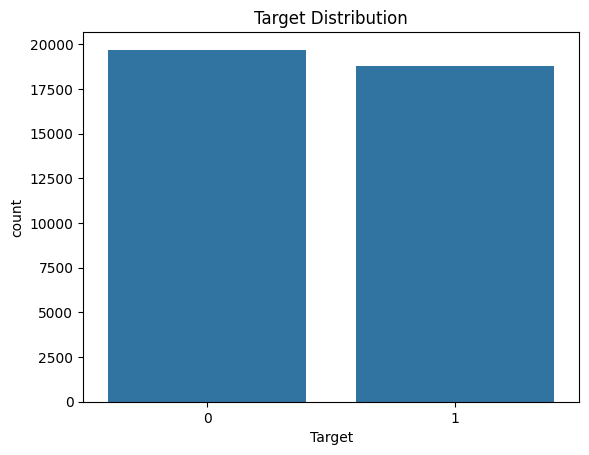


--- CV results for RandomForest ---
accuracy  : 0.6574 ± 0.0037
precision : 0.6424 ± 0.0038
recall    : 0.6722 ± 0.0044
f1        : 0.6570 ± 0.0038

--- CV results for XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

accuracy  : 0.7027 ± 0.0045
precision : 0.6805 ± 0.0044
recall    : 0.7369 ± 0.0054
f1        : 0.7076 ± 0.0045

--- CV results for LightGBM ---
[LightGBM] [Info] Number of positive: 12020, number of negative: 12606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 24626, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 12021, number of negative: 12605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[2618 1321]
 [ 955 2802]]

Classification Report:
              precision    recall  f1-score   support

           0     0.7327    0.6646    0.6970      3939
           1     0.6796    0.7458    0.7112      3757

    accuracy                         0.7043      7696
   macro avg     0.7062    0.7052    0.7041      7696
weighted avg     0.7068    0.7043    0.7039      7696


=== Final evaluation for LightGBM ===
[LightGBM] [Info] Number of positive: 15026, number of negative: 15757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 30783, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Confusion M

In [ ]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- LOAD DATA ---
url = 'https://drive.google.com/uc?id=1or19PphGxg-JAi-2TJS97PdL9ZilUQIh'
df = pd.read_csv(url)

df = df.rename(columns={"Diabetes_binary": "Target"})
df = df.drop_duplicates()
df['Target'] = df['Target'].astype(int)

# --- EDA (optional) ---
sns.countplot(x='Target', data=df)
plt.title("Target Distribution")
plt.show()

# --- FEATURES / LABELS ---
X = df.drop('Target', axis=1)
y = df['Target']

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- CLASS WEIGHTS ---
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, weights))

# --- MODELS ---
models = {
    'RandomForest': RandomForestClassifier(
        class_weight=class_weight_dict, random_state=42
    ),
    'XGBoost': XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        tree_method='hist',
        use_label_encoder=False,
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        objective='binary',
        class_weight='balanced',
        n_estimators=100,
        random_state=42
    )
}

# --- CROSS-VALIDATION ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    print(f"\n--- CV results for {name} ---")
    scores = {metric: [] for metric in scoring}

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        if name == 'XGBoost':
            sw = y_tr.map(class_weight_dict)
            model.fit(X_tr, y_tr, sample_weight=sw)
        else:
            model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        scores['accuracy'].append(accuracy_score(y_val, y_pred))
        scores['precision'].append(precision_score(y_val, y_pred))
        scores['recall'].append(recall_score(y_val, y_pred))
        scores['f1'].append(f1_score(y_val, y_pred))

    for metric in scoring:
        mean = np.mean(scores[metric])
        std = np.std(scores[metric])
        print(f"{metric:10s}: {mean:.4f} ± {std:.4f}")

# --- FINAL EVALUATION ON TEST SET ---
for name, model in models.items():
    print(f"\n=== Final evaluation for {name} ===")
    if name == 'XGBoost':
        sw = y_train.map(class_weight_dict)
        model.fit(X_train, y_train, sample_weight=sw)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
